### 置信度和置信区间

我们通过一个例子来说明这两个概念：

假设我们想知道美国有多少人热爱足球。为了得到 100％ 正确的答案，我们可以做的唯一一件事是向美国的每一位公民询问他们是否热爱足球。很明显这是不现实的，因此我们必须通过问更少的人来得到答案。

这就需要我们进行样本随机抽样，但是对于抽取的样本得到的结果，我们并不能100%的确定其准确性。所以我们试图得到一个区间，例如我们95%的相信美国足球爱好者的比例是58%至62%。这就是置信区间的由来，我们有一个区间，并且对它有一定的信心。

因此，我们随机抽取1000个美国人的样本，在这1000个人里63%的人喜欢足球，那么我们可以推断出整个美国人口的情况吗？

为了回答这个问题，我希望我们以一个不同的方式来看待它。假设我们知道（理论上）美国人的确切比例，假设它是 65％，那么随机挑选 1000 人只有 63％ 的人喜欢足球的机会是多少？让我们用 Python 来探索这个问题！

In [1]:
import numpy as np

In [25]:
# 在下面这段代码中，我创建了一个表示 3.25 亿人的 NumPy 数组，对于每个人，如果他/她喜欢足球，那么我会存储 1，否则就是零。

In [2]:
love_soccer_prop = 0.65 #Real percentage of people who love soccer
total_population = 325*10**6 # Total population in the U.S. (325M)
num_people_love_soccer = int(total_population * love_soccer_prop)
num_people_dont_love_soccer = int(total_population * (1-love_soccer_prop))
people_love_soccer = np.ones(num_people_love_soccer)
people_dont_love_soccer = np.zeros(num_people_dont_love_soccer)
all_people = np.hstack([people_love_soccer, people_dont_love_soccer])
a = all_people.mean()

In [3]:
a

0.65

现在我们从3.25亿人中,随机抽取1000个样本，看看得到的百分比是多少：

In [4]:
for i in range(10):
    sample = np.random.choice(all_people, size = 1000)
    print ('sample',i,':',np.mean(sample))

sample 0 : 0.641
sample 1 : 0.628
sample 2 : 0.673
sample 3 : 0.652
sample 4 : 0.628
sample 5 : 0.625
sample 6 : 0.648
sample 7 : 0.664
sample 8 : 0.66
sample 9 : 0.655


对于每组样本，我们获得了不同的值，但直觉（和统计理论）表示，大量样本的平均值应该非常接近真实百分比。让我们这样试试！我们取很多样本，然后看看会发生什么：

In [5]:
values = []

In [40]:
for i in range(10000):
    sample = np.random.choice(all_people, size=1000)
    mean = np.mean(sample)
    values.append(mean)

In [41]:
np.mean(values)

0.65005835

这已经非常接近正确值了，下面让我们画出来

In [42]:
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
#设置作图风格
sns.set_style("darkgrid")

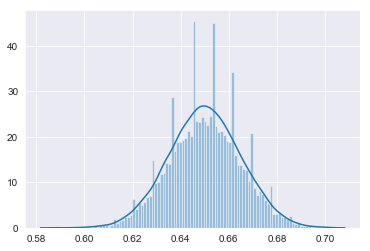

In [43]:
sns.distplot(values,bins=100)

可以看到这个图和正态分布非常相似，假设这样做了无数次，我们将得到非常接近正态分布的直方图，我们可以知道该分布的参数。用更简单的话来说，我们会知道这个直方图的形状，所以我们可以精确地知道在任意数值范围内有多少个样本。

首先，我们可以看到直方图的中心（平均值）接近 65％，正如我们所预期的，但我们可以通过查看直方图来得到更多信息，例如，我们可以说，一半样本都大于 65％，或者我们可以说大约 25％ 的样本大于 67％，甚至可以说（大致）只有 2.5％ 的样本大于 68％。

让我们回到我们的例子，我们抽取了 1000 人的样本，得到了 63％，我们想知道，随机抽样的 1000 人中有 63％ 的足球爱好者的概率是多少。使用这个直方图，我们可以说有（大概）25％的概率，我们会得到一个小于或等于 63％ 的值。该理论告诉我们，我们实际上并不需要得到无限的样本，如果我们随机选择 1000 人，只有 63％ 的人喜欢足球是可能发生的。

实际上，为了找到不同数值范围或区间的概率，我们需要知道或至少估计总体分布的标准差。

关于正态分布有下面的性质：

![](images/Normal_distribution.jpg)

这里 μ 是总体分布的平均值（我们例子中足球爱好者的实际百分比），σ 是总体分布的标准差。

如果我们知道这一点（并且我们知道标准差），我们可以说约 68％ 的样本会落在红色区域，或者 95％ 以上的样品会落在图中的绿色区域之外：

![](images/Normal_distribution_1.jpg)

如果我们在之前假设的实际百分比 65％ 上使用该图，那么 95％ 以上的样本将在 62％ 和 68％ 之间（+ - 3）。

当然，距离是对称的，所以如果样本有 95% 落在在实际百分比 -3 和 +3 之间，那么真实百分比落在样本百分比 -3 和 +3 之间的概率为 95％。

如果我们抽取一个样本，得到了 63％，那么我们可以说我们 95％ 确信实际比例在 60％（63-3）和 66％（63 + 3）之间。

这就是置信区间，区间为 63 + -3，置信度为 95％。